In [1]:
import pandas as pd
import plotly.figure_factory as ff

Let's plot a Gantt chart of survey years contained in the survey summary

In [18]:
df = pd.read_csv("../ESFA/survey_details/survey.csv", encoding="utf_16_le")
df.columns

Index(['Country DESC', 'Start Year ID', 'Survey DESC', 'CODE',
       'Reference publication', 'Consecutive replicates', 'Replicates',
       'Interview meetings', 'Response rate (%)', 'Min age range (years)',
       'Max age range (years)', 'Number of subjects', 'Under-reporters (%)',
       'Survey period', 'Age range (year)', 'Survey Comment', 'Survey start',
       'Survey end', 'Sampling method', 'Sample unit', 'Over sampled',
       'Dietary software', 'Method under-reporters'],
      dtype='object')

In [19]:
df_gantt = df[["Country DESC", "Survey start", "Survey end"]].rename(columns={"Country DESC":"Task", "Survey start":"Start", "Survey end":"Finish"})

df_gantt["Start"] = pd.to_datetime(df_gantt["Start"])
df_gantt["Finish"] = pd.to_datetime(df_gantt["Finish"])

In [20]:
df_gantt.head()

,Task,Start,Finish
0,Austria,2005-06-01,2006-06-01
1,Austria,2010-08-15,2012-02-15
2,Austria,2010-08-15,2012-02-15
3,Belgium,2002-01-01,2002-12-31
4,Belgium,2004-01-01,2004-12-31


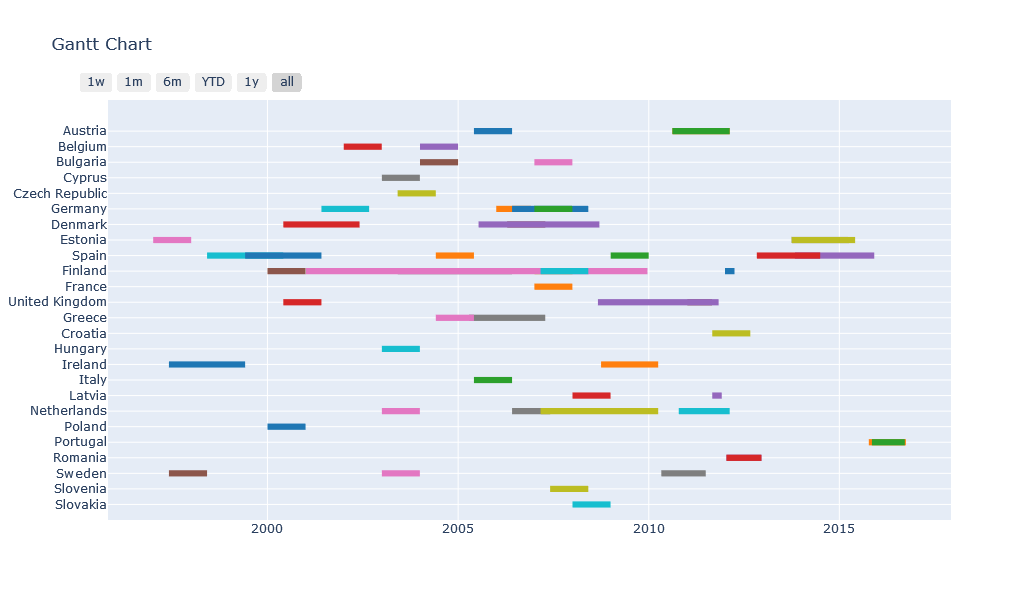

In [21]:
fig = ff.create_gantt(df_gantt, group_tasks=True, showgrid_x=True, showgrid_y=True)
fig.show()

We notice that we don't have all these surveys in the Chronic Food consumption dataset downloaded by the visualization tool (eg the Estonia 1997 survey is missing), therefore we will use the full dataset.